# The Fast Fourier Transform (FFT)

The Fourier Transform in some form or another, shows up everywhere -- in continuous math, discrete math, everywhere.

## Discrete Fourier Transform

With matrices:

$n \times n$ Fourier matrix: 

$$F_n = [e^{-2\pi i j k/n}]_{0 \le j < n, 0 \le k < n}$$

$$F_2 = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Fourier transform: Given data $x \in \mathbf{C}^n$, $y = F_n x$ is the Fourier transform. Of course, it is not done this way! The matrix has a lot of structure and can be done in $n \log_2 n$ steps.

In [1]:
n = 4; round.([exp(-2π * im * j * k / n) for j=0:3, k=0:3])

4×4 Array{Complex{Float64},2}:
 1.0-0.0im   1.0-0.0im   1.0-0.0im   1.0-0.0im
 1.0-0.0im   0.0-1.0im  -1.0-0.0im  -0.0+1.0im
 1.0-0.0im  -1.0-0.0im   1.0+0.0im  -1.0-0.0im
 1.0-0.0im  -0.0+1.0im  -1.0-0.0im   0.0-1.0im

In [2]:
using LinearAlgebra, FFTW
F(n) = fft(Matrix(I,n,n), 1)

F (generic function with 1 method)

In [3]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4672083401560325965\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13007400302883402308\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/3434a49bee3b9ba75a91409c617fa3c2264d8c63-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-4672083401560325965\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

In [4]:
@manipulate for n in 1:10
    F(n)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-91d1ad8d-5531-46e8-998f-6c9ae1df7709", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-91d1ad8d-5531-46e8-998f-6c9ae1df7709\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-91d1ad8d-5531-46e8-998f-6c9ae1df7709\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.o

In [20]:
using PyPlot

In [26]:
fig = figure()

@manipulate for n = 2:50
    withfig(fig) do
        for i in 1:n
            FF = F(n)[:,i]
            plot(real(FF), imag(FF))
            axis("image")
        end
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-f7496d0a-8a46-465b-ab84-ef70074c736f", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>2,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
26, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-f7496d0a-8a46-465b-ab84-ef70074c736f\",\"id\":\"ob_45\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knocko

In [5]:
using Plots

In [6]:
pyplot()

Plots.PyPlotBackend()

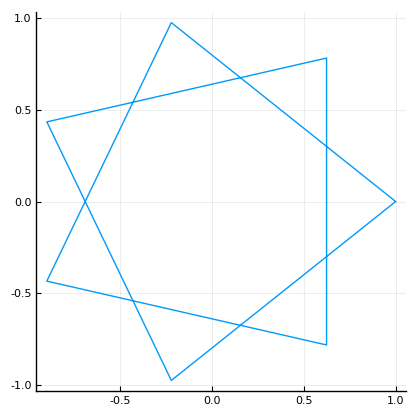

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-bbf4fd1e-1a40-4eca-aa95-af2724e97c82", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>2,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82

In [23]:
n=101
@manipulate for i=2:n-1
    plot()  
    FF = F(n)[:,i]
    plot!([real(FF);1], [imag(FF);0])  
    plot!(aspect_ratio=1,legend=false)
end

In [12]:
@manipulate for n=2:50
    plot()
    for i=1:n
        FF = F(n)[:,i]
           plot!(real(FF), imag(FF))
    end
    plot!(aspect_ratio=1,legend=false)
    end        

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-36f38eed-2890-4712-9872-c52871e661d4", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>2,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
26, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-36f38eed-2890-4712-9872-c52871e661d4\",\"id\":\"ob_42\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knocko

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-c8036ba8-d0ac-46c2-a285-542313cb709f", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>3,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"8

## Taylor series using the FFT:

In [25]:
F8 = F(8)
r = F8[:, 2]  # 8 roots of unity

8-element Array{Complex{Float64},1}:
                 1.0 + 0.0im               
  0.7071067811865476 - 0.7071067811865476im
                 0.0 - 1.0im               
 -0.7071067811865476 - 0.7071067811865476im
                -1.0 + 0.0im               
 -0.7071067811865476 + 0.7071067811865476im
                 0.0 + 1.0im               
  0.7071067811865476 + 0.7071067811865476im

In [26]:
ifft(exp.(r))

8-element Array{Complex{Float64},1}:
    1.0000248015873494 + 0.0im
    1.0000027557319253 + 0.0im
    0.5000002755731924 + 0.0im
    0.1666666917187751 + 0.0im
   0.04166666875434233 + 0.0im
  0.008333333493923706 + 0.0im
 0.0013888889003595972 + 0.0im
 0.0001984126991773083 + 0.0im

The main point of the $n \log n$ algorithm: $F_8$ is essentially made up of $F_4$s.

In [27]:
F(4)

4×4 Array{Complex{Float64},2}:
 1.0+0.0im   1.0+0.0im   1.0+0.0im   1.0+0.0im
 1.0+0.0im   0.0-1.0im  -1.0+0.0im   0.0+1.0im
 1.0+0.0im  -1.0+0.0im   1.0+0.0im  -1.0+0.0im
 1.0+0.0im   0.0+1.0im  -1.0+0.0im   0.0-1.0im

In [28]:
F(8)

8×8 Array{Complex{Float64},2}:
 1.0+0.0im        1.0+0.0im       …   1.0+0.0im        1.0+0.0im     
 1.0+0.0im   0.707107-0.707107im      0.0+1.0im   0.707107+0.707107im
 1.0+0.0im        0.0-1.0im          -1.0+0.0im        0.0+1.0im     
 1.0+0.0im  -0.707107-0.707107im      0.0-1.0im  -0.707107+0.707107im
 1.0+0.0im       -1.0+0.0im           1.0+0.0im       -1.0+0.0im     
 1.0+0.0im  -0.707107+0.707107im  …   0.0+1.0im  -0.707107-0.707107im
 1.0+0.0im        0.0+1.0im          -1.0+0.0im        0.0-1.0im     
 1.0+0.0im   0.707107+0.707107im      0.0-1.0im   0.707107-0.707107im

$$F_8[:, \mathrm{even columns, odd columns}] = \begin{bmatrix} F_4 & D_4  F_4 \\ F_4 & -D_4 F_4  \end{bmatrix}$$

The $D_4$s are called **twiddle factors**.

In [41]:
F4 = F(4)

4×4 Array{Complex{Float64},2}:
 1.0+0.0im   1.0+0.0im   1.0+0.0im   1.0+0.0im
 1.0+0.0im   0.0-1.0im  -1.0+0.0im   0.0+1.0im
 1.0+0.0im  -1.0+0.0im   1.0+0.0im  -1.0+0.0im
 1.0+0.0im   0.0+1.0im  -1.0+0.0im   0.0-1.0im

In [34]:
F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][1:4, 1:4] == F(4)

true

In [35]:
F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][5:8, 1:4] == F(4)

true

In [46]:
F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][1:4, 5:8] * inv(F4)

4×4 Array{Complex{Float64},2}:
 1.0+0.0im       0.0+0.0im       0.0+0.0im        0.0+0.0im     
 0.0+0.0im  0.707107-0.707107im  0.0+0.0im        0.0+0.0im     
 0.0+0.0im       0.0+0.0im       0.0-1.0im        0.0+0.0im     
 0.0+0.0im       0.0+0.0im       0.0+0.0im  -0.707107-0.707107im

In [47]:
(F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][5:8, 5:8]) * inv(F4)

4×4 Array{Complex{Float64},2}:
 -1.0+0.0im        0.0+0.0im       0.0+0.0im       0.0+0.0im     
  0.0+0.0im  -0.707107+0.707107im  0.0+0.0im       0.0+0.0im     
  0.0+0.0im        0.0+0.0im       0.0+1.0im       0.0+0.0im     
  0.0+0.0im        0.0+0.0im       0.0+0.0im  0.707107+0.707107im

"Decimation in time or in frequency"